In [1]:
%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the countries.csv directly via URL import into your panda data frame!

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/edlich/eternalrepo/master/DS-WAHLFACH/countries.csv')

# Display some basic information as rows, columns, and some basic statistical info.

In [3]:
df.describe()

,People,Area,BIP
count,5.000000e+00,5.000000e+00,5.00000
mean,1.027863e+08,3.907400e+06,2716.20000
std,6.759970e+07,4.904957e+06,1457.86083
min,3.650310e+07,3.013380e+05,1529.00000
25%,6.050172e+07,3.573850e+05,1798.00000
50%,8.252165e+07,3.778350e+05,1850.00000
75%,1.260450e+08,8.515770e+06,3466.00000
max,2.083600e+08,9.984670e+06,4938.00000


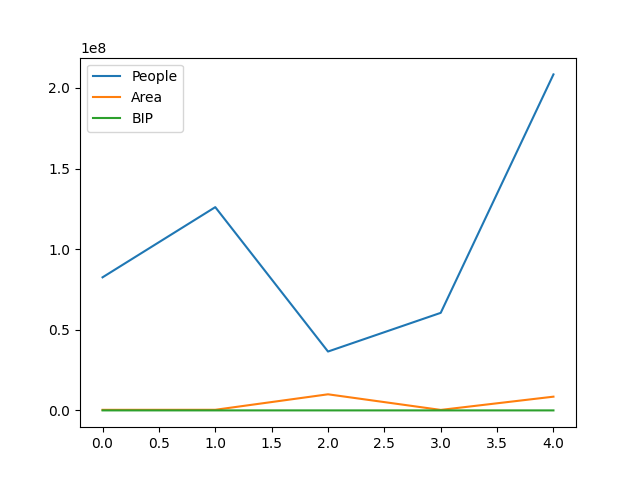

In [4]:
df.plot()
plt.show()

# Show the last 4 rows of the data frame.

In [5]:
df.tail(4)

,Name,People,Area,BIP,Currency
1,Japan,126045000,377835,4938,YEN
2,Canada,36503097,9984670,1529,CAD
3,Italy,60501718,301338,1850,EUR
4,Brazilia,208360000,8515770,1798,REAL


# Show all the row of countries who have the EURO

In [6]:
df[df.Currency == 'EUR']

,Name,People,Area,BIP,Currency
0,Germany,82521653,357385,3466,EUR
3,Italy,60501718,301338,1850,EUR


# Show only name and Currency in a new data frame

In [7]:
df2 = df.drop(['People', 'Area', 'BIP'], axis=1)

In [8]:
df2

,Name,Currency
0,Germany,EUR
1,Japan,YEN
2,Canada,CAD
3,Italy,EUR
4,Brazilia,REAL


# Show only the rows/countries that have more than 2000 BIP (it is in Milliarden USD Bruttoinlandsprodukt)

In [9]:
df[df.BIP > 2000]

,Name,People,Area,BIP,Currency
0,Germany,82521653,357385,3466,EUR
1,Japan,126045000,377835,4938,YEN


# Select all countries where with inhabitants between 50 and 150 Mio

In [10]:
df[(df.People >= 50000000) & (df.People <= 150000000)]

,Name,People,Area,BIP,Currency
0,Germany,82521653,357385,3466,EUR
1,Japan,126045000,377835,4938,YEN
3,Italy,60501718,301338,1850,EUR


# Change BIP to Bip

In [11]:
df = df.rename(columns={'BIP': 'Bip'})

In [12]:
df

,Name,People,Area,Bip,Currency
0,Germany,82521653,357385,3466,EUR
1,Japan,126045000,377835,4938,YEN
2,Canada,36503097,9984670,1529,CAD
3,Italy,60501718,301338,1850,EUR
4,Brazilia,208360000,8515770,1798,REAL


# Calculate the Bip sum

In [13]:
df['Bip'].sum()

13581

# Calculate the average people of all countries

In [14]:
df['People'].mean()

102786293.6

# Sort by name alphabetically

In [15]:
df.sort_values(by=['Name'])

,Name,People,Area,Bip,Currency
4,Brazilia,208360000,8515770,1798,REAL
2,Canada,36503097,9984670,1529,CAD
0,Germany,82521653,357385,3466,EUR
3,Italy,60501718,301338,1850,EUR
1,Japan,126045000,377835,4938,YEN


# Create a new data frame from the original where the area is changed as follows: all countries with > 1000000 get BIG and <= 1000000 get SMALL in the cell replaced!

In [16]:
df3 = df.copy(deep=True)

In [17]:
def mapToText(row):    
    if int(row['People']) > 1000000:
         text = 'BIG'
    else:
        text = 'SMALL'
    return text

In [18]:
df3['NewPeople'] = df3.apply(mapToText, axis=1)
df3 = df3.drop(columns=['People'])
df3 = df3.rename(columns={'NewPeople': 'People'})

In [19]:
df3

,Name,Area,Bip,Currency,People
0,Germany,357385,3466,EUR,BIG
1,Japan,377835,4938,YEN,BIG
2,Canada,9984670,1529,CAD,BIG
3,Italy,301338,1850,EUR,BIG
4,Brazilia,8515770,1798,REAL,BIG
